<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/Estudo%20Strangle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Parâmetros
S = np.linspace(30, 50, 100)  # Variação do preço do ativo
K = 38  # Preço de exercício
r = 0.10  # Taxa de juros livre de risco
σ = 0.25  # Volatilidade

S1 = 38  # Preço atual do ativo subjacente
t = 252    # Tempo do ano em dias
T = (40/t)  # Tempo até o vencimento em dias

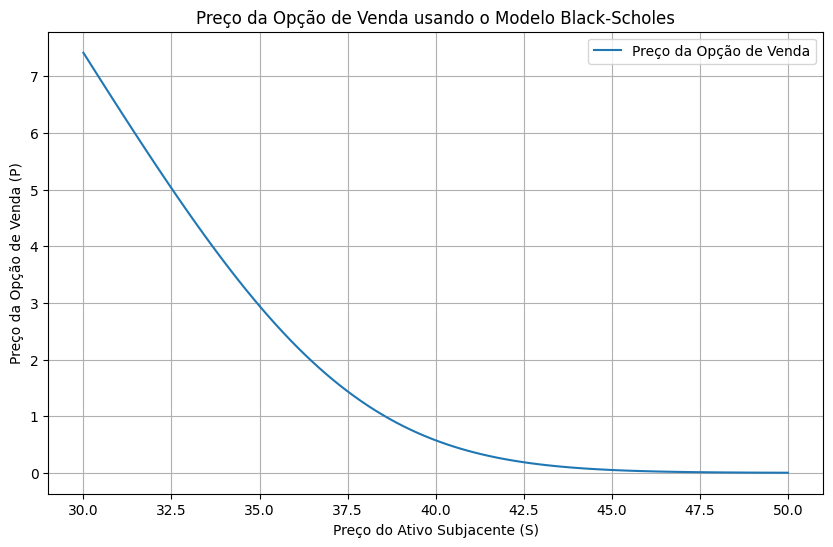

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Fórmulas de d1 e d2
d1 = (np.log(S / K) + (r + σ**2 / 2) * T) / (σ * np.sqrt(T))
d2 = d1 - σ * np.sqrt(T)

# Preço da opção de venda
P = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(S, P, label='Preço da Opção de Venda')
plt.xlabel('Preço do Ativo Subjacente (S)')
plt.ylabel('Preço da Opção de Venda (P)')
plt.title('Preço da Opção de Venda usando o Modelo Black-Scholes')
plt.legend()
plt.grid(True)
plt.show()


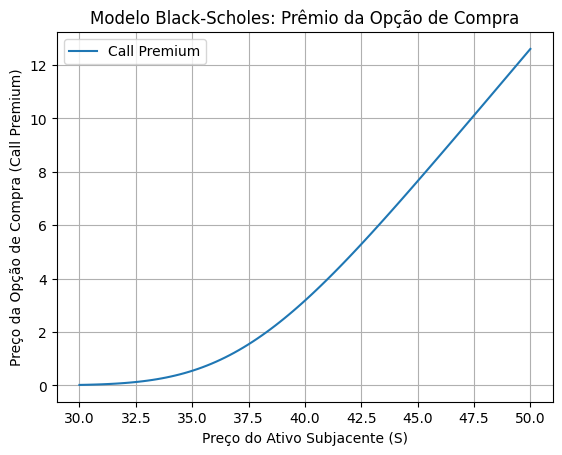

In [24]:
import scipy.stats as stats

# Função Black-Scholes para opção de compra (call)
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)
    return call_price

# Calculando os preços das opções de compra
call_prices = [black_scholes_call(s, K, T, r, sigma) for s in S]

# Plotando o gráfico
plt.plot(S, call_prices, label='Call Premium')
plt.xlabel('Preço do Ativo Subjacente (S)')
plt.ylabel('Preço da Opção de Compra (Call Premium)')
plt.title('Modelo Black-Scholes: Prêmio da Opção de Compra')
plt.legend()
plt.grid(True)
plt.show()


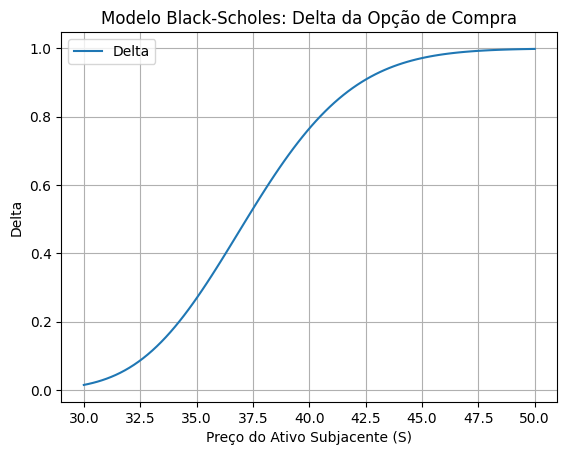

In [25]:
# Função Delta para opção de compra (call)
def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    delta = stats.norm.cdf(d1)
    return delta

# Calculando o Delta
delta_values = [delta_call(s, K, T, r, sigma) for s in S]

# Plotando o gráfico do Delta
plt.plot(S, delta_values, label='Delta')
plt.xlabel('Preço do Ativo Subjacente (S)')
plt.ylabel('Delta')
plt.title('Modelo Black-Scholes: Delta da Opção de Compra')
plt.legend()
plt.grid(True)
plt.show()


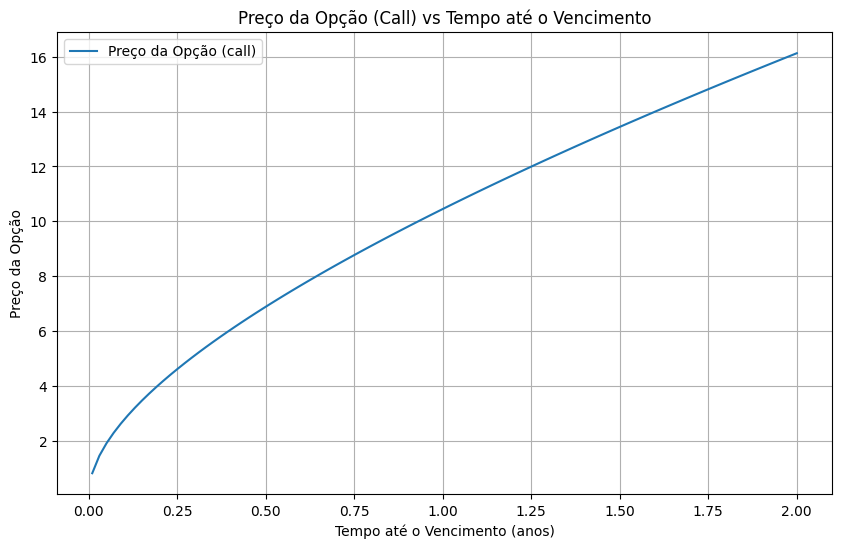

Preço da opção de call: 10.45


In [26]:
# Função para calcular o preço de uma opção de compra (call) usando o modelo Black-Scholes
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)
    return call_price

# Função para calcular o preço de uma opção de venda (put) usando o modelo Black-Scholes
def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * stats.norm.cdf(-d2) - S * stats.norm.cdf(-d1)
    return put_price

# Função para calcular o preço da opção baseado no tipo (call ou put)
def black_scholes_option(S, K, T, r, sigma, option_type='call'):
    if option_type == 'call':
        return black_scholes_call(S, K, T, r, sigma)
    elif option_type == 'put':
        return black_scholes_put(S, K, T, r, sigma)
    else:
        raise ValueError("option_type deve ser 'call' ou 'put'")

# Parâmetros
S = 100  # Preço atual do ativo subjacente
K = 100  # Preço de exercício (strike price)
r = 0.05 # Taxa de juros livre de risco
sigma = 0.2  # Volatilidade do ativo subjacente
option_type = 'call'  # Tipo da opção ('call' ou 'put')

# Geração dos dados para os gráficos
T_values = np.linspace(0.01, 2, 100)  # Vários tempos até o vencimento
prices = [black_scholes_option(S, K, T, r, sigma, option_type) for T in T_values]

# Plot do gráfico
plt.figure(figsize=(10, 6))
plt.plot(T_values, prices, label=f'Preço da Opção ({option_type})')
plt.xlabel('Tempo até o Vencimento (anos)')
plt.ylabel('Preço da Opção')
plt.title(f'Preço da Opção ({option_type.capitalize()}) vs Tempo até o Vencimento')
plt.legend()
plt.grid(True)
plt.show()

# Exemplo de uso
print(f"Preço da opção de {option_type}: {black_scholes_option(S, K, 1, r, sigma, option_type):.2f}")


Para diferentes tempos até a término da opção

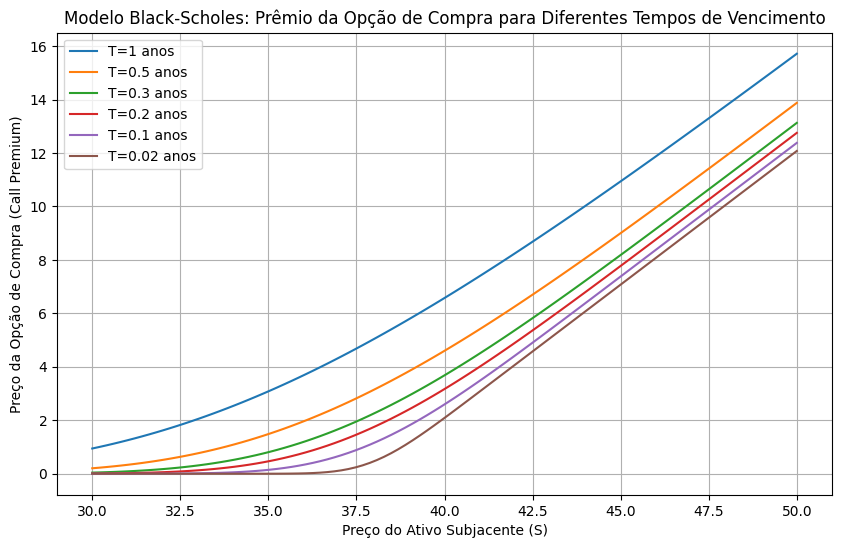

In [32]:
# Função Black-Scholes para opção de compra (call)
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)
    return call_price

# Diferentes tempos de vencimento
T_values = [1, 0.5, 0.3, 0.2, 0.1, 0.02]

# Plotando os gráficos para diferentes valores de T
plt.figure(figsize=(10, 6))

for T in T_values:
    call_prices = [black_scholes_call(s, K, T, r, sigma) for s in S]
    plt.plot(S, call_prices, label=f'T={T} anos')

plt.xlabel('Preço do Ativo Subjacente (S)')
plt.ylabel('Preço da Opção de Compra (Call Premium)')
plt.title('Modelo Black-Scholes: Prêmio da Opção de Compra para Diferentes Tempos de Vencimento')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from scipy.stats import norm

def black_scholes_gregas(S, K, T, r, σ, option_type='call'):
    """
    Calcula as gregas para uma opção de compra ou venda usando o modelo Black-Scholes.

    Parâmetros:
    S: Preço atual do ativo subjacente
    K: Preço de exercício da opção
    T: Tempo até o vencimento (em anos)
    r: Taxa de juros livre de risco
    σ: Volatilidade do ativo subjacente
    option_type: 'call' para opção de compra, 'put' para opção de venda

    Retorna:
    Delta, Gamma, Theta, Vega, Rho
    """
    d1 = (np.log(S / K) + (r + 0.5 * σ**2) * T) / (σ * np.sqrt(T))
    d2 = d1 - σ * np.sqrt(T)

    if option_type == 'call':
        delta = norm.cdf(d1)
        theta = (-S * norm.pdf(d1) * σ / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)) / 365
        rho = K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        delta = -norm.cdf(-d1)
        theta = (-S * norm.pdf(d1) * σ / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)) / 365
        rho = -K * T * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("option_type deve ser 'call' ou 'put'")

    gamma = norm.pdf(d1) / (S * σ * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T) / 100

    return delta, gamma, theta, vega, rho

# Parâmetros de exemplo
S = 37  # Preço do ativo subjacente
#K = 100  # Preço de exercício
##T = 1  # Tempo até o vencimento em anos
#r = 0.05  # Taxa de juros livre de risco
#σ = 0.2  # Volatilidade

# Cálculo das gregas para uma opção de compra
delta, gamma, theta, vega, rho = black_scholes_gregas(S, K, T, r, σ, 'call')
print(f"Call Option Gregas:\nDelta: {delta}\nGamma: {gamma}\nTheta: {theta}\nVega: {vega}\nRho: {rho}")

# Cálculo das gregas para uma opção de venda
delta, gamma, theta, vega, rho = black_scholes_gregas(S, K, T, r, σ, 'put')
print(f"\nPut Option Gregas:\nDelta: {delta}\nGamma: {gamma}\nTheta: {theta}\nVega: {vega}\nRho: {rho}")


Call Option Gregas:
Delta: 3.209374125622521e-19
Gamma: 7.121975562591022e-19
Theta: -5.503189435169267e-20
Vega: 5.849990727112265e-19
Rho: 3.520034087961616e-18

Put Option Gregas:
Delta: -1.0
Gamma: 7.121975562591022e-19
Theta: 0.013494684104151541
Vega: 5.849990727112265e-19
Rho: -29.55335818809188


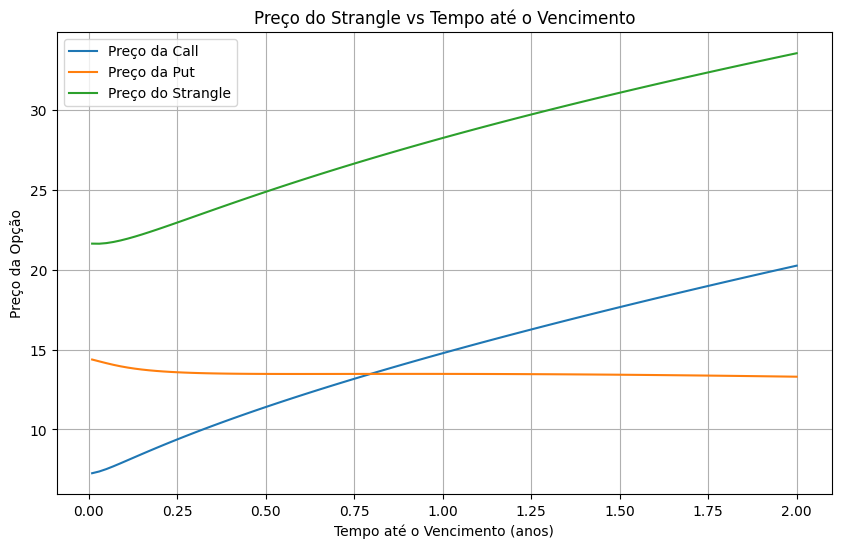

Preço da Call com delta ~0.30: 14.78
Preço da Put com delta ~-0.30: 13.48
Preço do Strangle: 28.26


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Função para calcular o delta de uma opção de compra (call)
def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return stats.norm.cdf(d1)

# Função para calcular o delta de uma opção de venda (put)
def delta_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return stats.norm.cdf(d1) - 1

# Função para calcular o preço de uma opção de compra (call) usando o modelo Black-Scholes
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)
    return call_price

# Função para calcular o preço de uma opção de venda (put) usando o modelo Black-Scholes
def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * stats.norm.cdf(-d2) - S * stats.norm.cdf(-d1)
    return put_price

# Parâmetros
S = 100  # Preço atual do ativo subjacente
r = 0.05 # Taxa de juros livre de risco
sigma = 0.2  # Volatilidade do ativo subjacente

# Cálculo dos preços de exercício (K) para deltas próximos de ±0.30
K_call = S * np.exp((r - 0.5 * sigma**2) * 1 + sigma * np.sqrt(1) * stats.norm.ppf(0.30))
K_put = S * np.exp((r - 0.5 * sigma**2) * 1 + sigma * np.sqrt(1) * stats.norm.ppf(0.70))

# Geração dos dados para os gráficos
T_values = np.linspace(0.01, 2, 100)  # Vários tempos até o vencimento
call_prices = [black_scholes_call(S, K_call, T, r, sigma) for T in T_values]
put_prices = [black_scholes_put(S, K_put, T, r, sigma) for T in T_values]
strangle_prices = [call + put for call, put in zip(call_prices, put_prices)]

# Plot do gráfico
plt.figure(figsize=(10, 6))
plt.plot(T_values, call_prices, label='Preço da Call')
plt.plot(T_values, put_prices, label='Preço da Put')
plt.plot(T_values, strangle_prices, label='Preço do Strangle')
plt.xlabel('Tempo até o Vencimento (anos)')
plt.ylabel('Preço da Opção')
plt.title('Preço do Strangle vs Tempo até o Vencimento')
plt.legend()
plt.grid(True)
plt.show()

# Exemplo de uso
print(f"Preço da Call com delta ~0.30: {black_scholes_call(S, K_call, 1, r, sigma):.2f}")
print(f"Preço da Put com delta ~-0.30: {black_scholes_put(S, K_put, 1, r, sigma):.2f}")
print(f"Preço do Strangle: {black_scholes_call(S, K_call, 1, r, sigma) + black_scholes_put(S, K_put, 1, r, sigma):.2f}")


In [ ]:
# Parâmetros
S = 38  # Preço atual do ativo subjacente
r = 0.10 # Taxa de juros livre de risco
sigma = 0.25  # Volatilidade do ativo subjacente
t = 252    # Tempo do ano em dias
T = (40/t)  # Tempo até o vencimento em dias

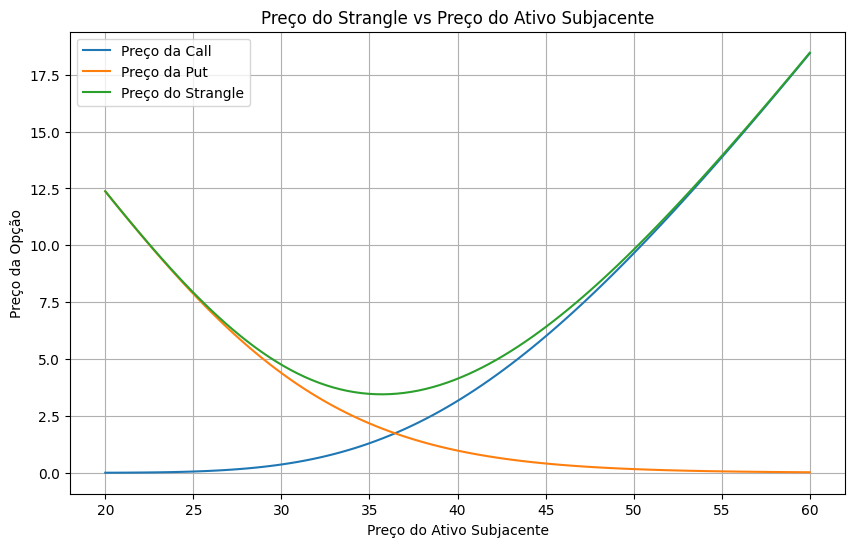

Preço da Call com delta ~0.30: 2.29
Preço da Put com delta ~-0.30: 1.36
Preço do Strangle: 3.65


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Funções para calcular o delta e preço de opções call e put
def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return stats.norm.cdf(d1)

def delta_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return stats.norm.cdf(d1) - 1

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)
    return call_price

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * stats.norm.cdf(-d2) - S * stats.norm.cdf(-d1)
    return put_price

# Cálculo dos preços de exercício (K) para deltas próximos de ±0.30
K_call = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * stats.norm.ppf(0.70))
K_put = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * stats.norm.ppf(0.30))

# Geração dos dados para os gráficos
S_values = np.linspace(20, 60, 100)  # Vários preços do ativo subjacente
call_prices = [black_scholes_call(S_, K_call, T, r, sigma) for S_ in S_values]
put_prices = [black_scholes_put(S_, K_put, T, r, sigma) for S_ in S_values]
strangle_prices = [call + put for call, put in zip(call_prices, put_prices)]

# Plot do gráfico
plt.figure(figsize=(10, 6))
plt.plot(S_values, call_prices, label='Preço da Call')
plt.plot(S_values, put_prices, label='Preço da Put')
plt.plot(S_values, strangle_prices, label='Preço do Strangle')
plt.xlabel('Preço do Ativo Subjacente')
plt.ylabel('Preço da Opção')
plt.title('Preço do Strangle vs Preço do Ativo Subjacente')
plt.legend()
plt.grid(True)
plt.show()

# Exemplo de uso
print(f"Preço da Call com delta ~0.30: {black_scholes_call(S, K_call, T, r, sigma):.2f}")
print(f"Preço da Put com delta ~-0.30: {black_scholes_put(S, K_put, T, r, sigma):.2f}")
print(f"Preço do Strangle: {black_scholes_call(S, K_call, T, r, sigma) + black_scholes_put(S, K_put, T, r, sigma):.2f}")



In [ ]:
S = np.linspace(20, 60, 100)   # Preços do ativo subjacente
T_values = [1, 0.5, 0.3]  # Tempos até o vencimento

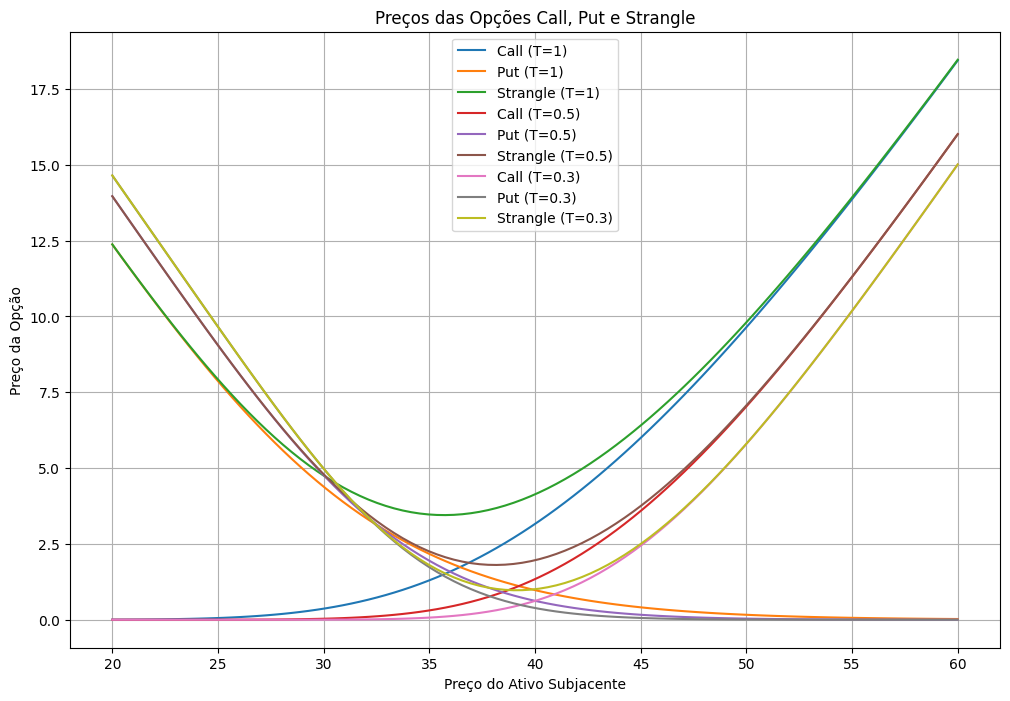

Para T=1:
Preço da Call: 58.01
Preço da Put: 0.00
Preço do Strangle: 58.01
---
Para T=0.5:
Preço da Call: 55.86
Preço da Put: 0.00
Preço do Strangle: 55.86
---
Para T=0.3:
Preço da Call: 54.97
Preço da Put: 0.00
Preço do Strangle: 54.97
---


In [ ]:
# Calcula e plota os preços das opções e do strangle para diferentes T
plt.figure(figsize=(12, 8))

for T in T_values:
    call_prices = [black_scholes_call(price, K_call, T, r, sigma) for price in S]
    put_prices = [black_scholes_put(price, K_put, T, r, sigma) for price in S]
    strangle_prices = [c + p for c, p in zip(call_prices, put_prices)]

    plt.plot(S, call_prices, label=f'Call (T={T})')
    plt.plot(S, put_prices, label=f'Put (T={T})')
    plt.plot(S, strangle_prices, label=f'Strangle (T={T})')

plt.xlabel('Preço do Ativo Subjacente')
plt.ylabel('Preço da Opção')
plt.title('Preços das Opções Call, Put e Strangle')
plt.legend()
plt.grid(True)
plt.show()

# Exibir os preços das opções e do strangle para um preço específico do ativo subjacente
preco_ativo = 100  # Exemplo de preço do ativo subjacente
for T in T_values:
    call_price = black_scholes_call(preco_ativo, K_call, T, r, sigma)
    put_price = black_scholes_put(preco_ativo, K_put, T, r, sigma)
    strangle_price = call_price + put_price
    print(f"Para T={T}:")
    print(f"Preço da Call: {call_price:.2f}")
    print(f"Preço da Put: {put_price:.2f}")
    print(f"Preço do Strangle: {strangle_price:.2f}")
    print('---')

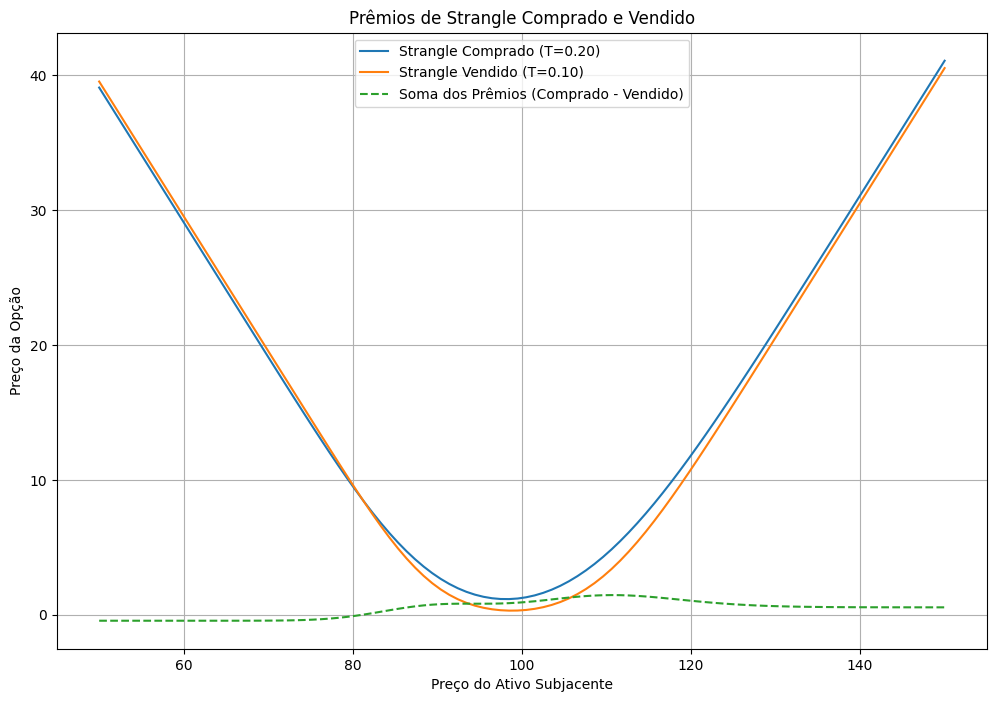

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Funções Black-Scholes para calcular o preço de opções call e put
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Parâmetros
S = np.linspace(50, 150, 100)  # Preços do ativo subjacente
K_call = 110  # Preço de exercício para a call
K_put = 90  # Preço de exercício para a put
r = 0.05  # Taxa de juros livre de risco
sigma = 0.2  # Volatilidade
T_bought = 0.20  # Tempo até o vencimento do strangle comprado
T_sold = 0.10  # Tempo até o vencimento do strangle vendido

# Calcula os preços das opções e do strangle comprado
call_bought_prices = [black_scholes_call(price, K_call, T_bought, r, sigma) for price in S]
put_bought_prices = [black_scholes_put(price, K_put, T_bought, r, sigma) for price in S]
strangle_bought_prices = [c + p for c, p in zip(call_bought_prices, put_bought_prices)]

# Calcula os preços das opções e do strangle vendido
call_sold_prices = [black_scholes_call(price, K_call, T_sold, r, sigma) for price in S]
put_sold_prices = [black_scholes_put(price, K_put, T_sold, r, sigma) for price in S]
strangle_sold_prices = [c + p for c, p in zip(call_sold_prices, put_sold_prices)]

# Soma dos prêmios do strangle comprado e vendido
total_strangle_prices = [b - s for b, s in zip(strangle_bought_prices, strangle_sold_prices)]

# Plota os gráficos
plt.figure(figsize=(12, 8))
plt.plot(S, strangle_bought_prices, label='Strangle Comprado (T=0.20)')
plt.plot(S, strangle_sold_prices, label='Strangle Vendido (T=0.10)')
plt.plot(S, total_strangle_prices, label='Soma dos Prêmios (Comprado - Vendido)', linestyle='--')

plt.xlabel('Preço do Ativo Subjacente')
plt.ylabel('Preço da Opção')
plt.title('Prêmios de Strangle Comprado e Vendido')
plt.legend()
plt.grid(True)
plt.show()
